In [2]:
import pathlib
import textwrap
import io
import base64
from PIL import Image
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

/Users/kesharaweerasinghe/anaconda3/envs/gemini/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Used to securely store your API key
from configparser import ConfigParser

config = ConfigParser()
config.read('credentials.ini')
api_key = config['API_KEY']['google_api_key']

genai.configure(api_key=api_key)

In [4]:
for model in genai.list_models():
    print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [5]:
model_gemini_vision_pro = genai.GenerativeModel('gemini-pro-vision')
model_gemini_pro = genai.GenerativeModel('gemini-pro')

In [6]:
def image_blob_creator(file_path, type):

    img = Image.open(file_path)
    image = img
    bytes_arr = io.BytesIO()
    img.save(bytes_arr, format=img.format)
    bytes_arr = bytes_arr.getvalue()

    encoded_image_data = base64.b64encode(bytes_arr)

    if type == 'jpg':
        type = 'jpeg'
        
    image_blob = {
        'mime_type' : f'image/{type}',
        'data': encoded_image_data.decode('utf-8')
    }

    return image_blob,image

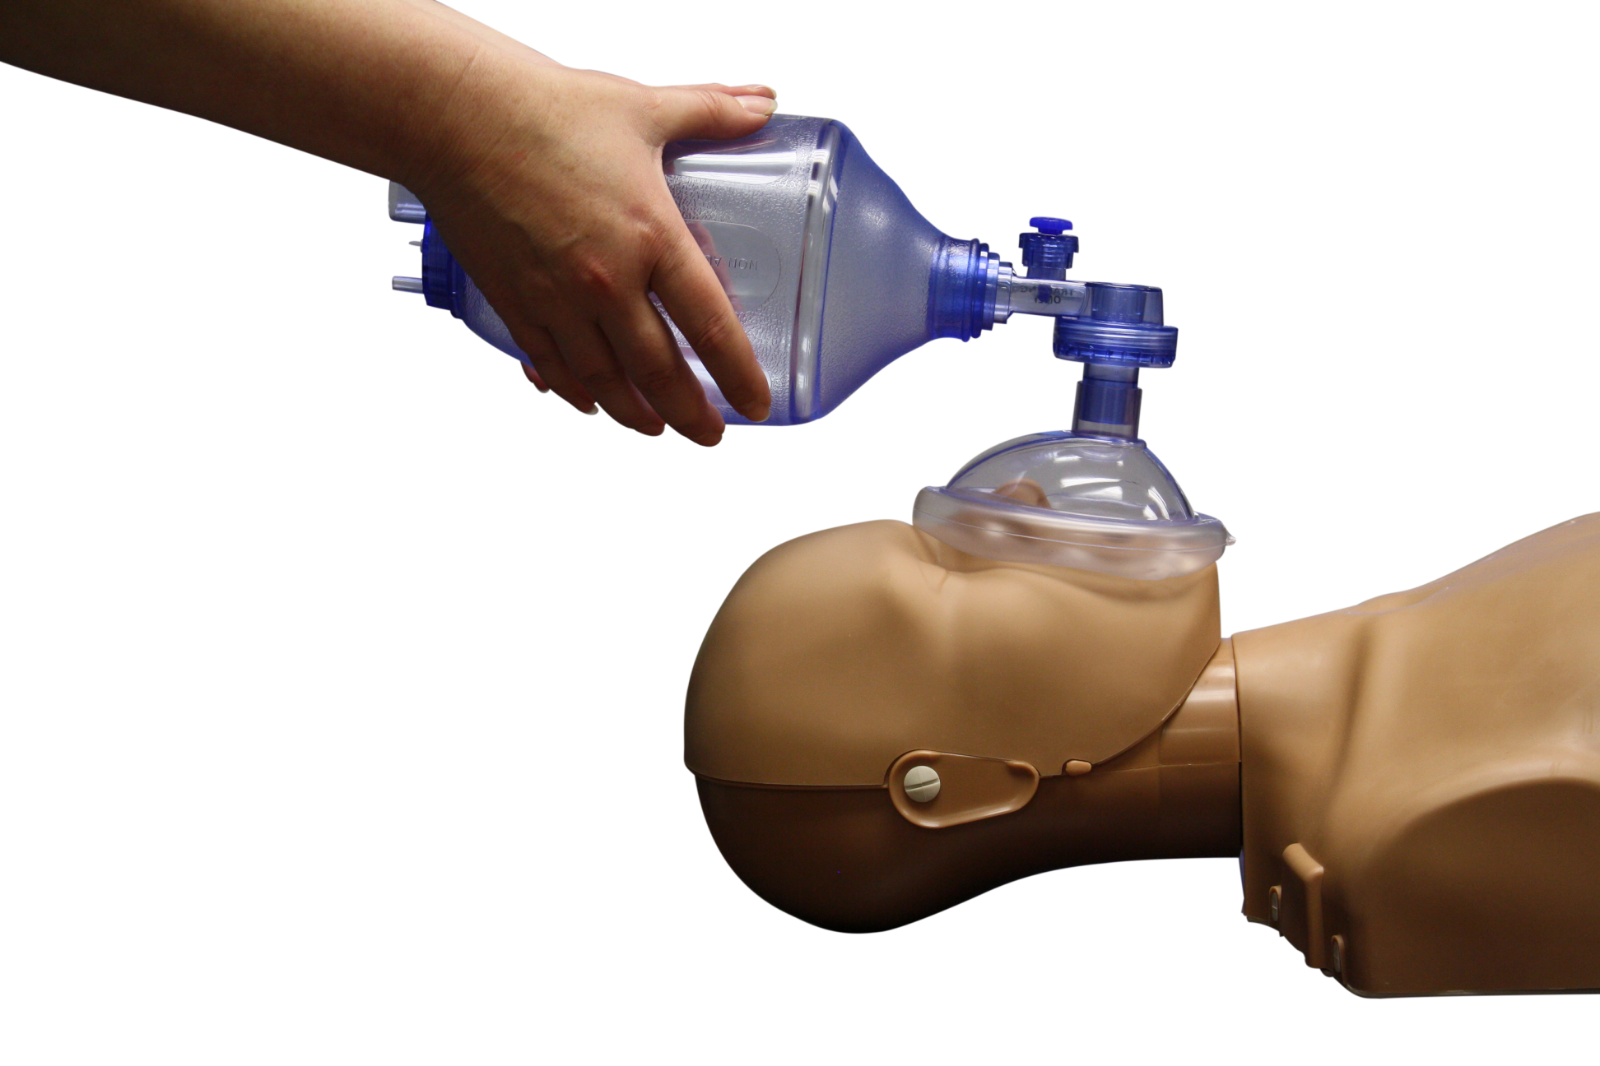

In [7]:
image_blob,img = image_blob_creator('./data/ems/bvm/$_57.png','png')
display(img)

### General Tasks

In [8]:
prompt = """ Give me code to create a socketio server in python """
response = model_gemini_pro.generate_content(
    [prompt],
    stream=True
)

for chunk in response:
    print(chunk.text)

```python
from flask import Flask, render_template
from flask_so
cketio import SocketIO

app = Flask(__name__)
app.config['SECRET_KEY'] = 'secret!'
socketio = SocketIO
(app)

@app.route('/')
def index():
    return render_template('index.html')

@socketio.on('message')
def handle_message(msg):
    print('Received message: ' + msg)
    send(msg, broadcast=True)


@socketio.on('connect')
def test_connect():
    print('Client connected')

@socketio.on('disconnect')
def test_disconnect():
    print('Client disconnected')

if __name__ == '__main__':
    socketio.run(app, debug=True)
```

This code creates a Flask application and initializes the SocketIO server. The `/` route is mapped to the `index.html` template, which is a simple HTML file. The `handle_message` event handler is triggered when a client sends a message to the server. The `
test_connect` and `test_disconnect` event handlers are triggered when a client connects or disconnects from the server, respectively. The `send` function

### Vision Related Tasks

In [9]:
prompt = """ Does the iamge have a bag valve mask?"""
# prompt = """ Mark the bag valve mask in the image and give it to me in a bounding box format """


response = model_gemini_vision_pro.generate_content(
    [prompt,{'inline_data':image_blob}],
    stream=True
)

for chunk in response:
    print(chunk.text)


 Yes


### Filter images using a criteria with Gemini AI

In [8]:
def gemini_image_filter(prompt, image_blob):
    response = model_gemini_vision_pro.generate_content(
    [prompt,{'inline_data':image_blob}],
    stream=True)

    filter_result = False
    for chunk in response:
        print('Gemini Response: ',chunk.text)
        if( 'Yes' in chunk.text):
            filter_result = True
            break
        else:
            filter_result = False

    return filter_result


In [15]:
import os
import time
import shutil


folder_path = "../image_downloader/dataset/iv_access/"
target_f_path = folder_path + 'filtered'
target_uf_path = folder_path + 'unfiltered'

if not os.path.exists(target_f_path):
    os.mkdir(target_f_path)

if not os.path.exists(target_uf_path):
    os.mkdir(target_uf_path)


prompt = """ does the picture have a real human hand? """


# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    # Check if it's a file (not a subdirectory)
    if os.path.isfile(os.path.join(folder_path, filename)):
        _, file_extension = os.path.splitext(filename)
        file_extension = file_extension.removeprefix('.')
        filepath = os.path.join(folder_path, filename)

        print(filepath)
        
        if file_extension == 'gif': pass
        try:
            image_blob,image = image_blob_creator(filepath, file_extension)
        except:
            pass

        print("Image: ",filename)

        result = False

        try:
            result = gemini_image_filter(prompt=prompt, image_blob=image_blob)
            print("Gemini Output: ", result)
        except:
            print("Gemini Error!")
        
        if(result):
            try:
                shutil.move(filepath,target_f_path)
            except:
                print("File move error!")
        else:
            try:
                shutil.move(filepath,target_uf_path)
            except:
                print("File move error!")


        time.sleep(3)
        




../image_downloader/dataset/iv_access/8.2IntravenousFluidTherapy–ClinicalProceduresforSafer....jpg
Image:  8.2IntravenousFluidTherapy–ClinicalProceduresforSafer....jpg
Gemini Response:   Yes.
Gemini Output:  True
../image_downloader/dataset/iv_access/Optisafe|IV&ArterialLineVascularAccessUltrasoundTrainer.jpg
Image:  Optisafe|IV&ArterialLineVascularAccessUltrasoundTrainer.jpg
Gemini Response:   No, this is a fake arm used for medical training.
Gemini Output:  False
../image_downloader/dataset/iv_access/VascularAccessTraining|Nipro.jpg
Image:  VascularAccessTraining|Nipro.jpg
Gemini Response:   No.
Gemini Output:  False
../image_downloader/dataset/iv_access/IVAccess-Veineux.jpg
Image:  IVAccess-Veineux.jpg
Gemini Response:   Yes.
Gemini Output:  True
../image_downloader/dataset/iv_access/BasicsofNursingPracticesandInterventions|Facultyof....jpg
Image:  BasicsofNursingPracticesandInterventions|Facultyof....jpg
Gemini Response:   No.
Gemini Output:  False
../image_downloader/dataset/iv_ac